In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

 # Regression with sklearn (for sentiment)

In [10]:
import pandas as pd

df_sentiment = pd.read_csv('sentiment_reduced.csv')
df_sentiment = df_sentiment.drop(columns='Unnamed: 0')
df_sentiment

,Sentiment,0,1,2,3,4,5,6,7,8,...,989,990,991,992,993,994,995,996,997,998
0,0,1,1,0,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,0,1,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,1,1,1,1,0,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
7,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
8,0,1,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,1,1,1,1,1,1,1,1,1,1,...,1,0,0,0,0,0,1,0,0,0


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score, precision_score, recall_score

X = df_sentiment.drop(['Sentiment'], axis = 1)
y = df_sentiment['Sentiment']

In [4]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 26)

In [5]:
x_train.shape, x_test.shape

((2400, 999), (600, 999))

In [6]:
from sklearn.linear_model import LogisticRegression

# Create instance of model
lreg = LogisticRegression()
# Pass training data into model
lreg.fit(x_train, y_train)

LogisticRegression()

In [7]:
y_pred_lreg = lreg.predict(x_test)

In [8]:
# Confusion Matrix
print('Logistic Regression')
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_lreg))
print('--'*50)

# Classification Report
print('Classification Report')
print(classification_report(y_test,y_pred_lreg))


# Accuracy of our model
print('--'*50)
logreg_accuracy = round(accuracy_score(y_test, y_pred_lreg) * 100,8)
print('Accuracy = ', logreg_accuracy,'%')

Logistic Regression


Confusion Matrix
[[210  73]
 [ 72 245]]
----------------------------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.74      0.74      0.74       283
           1       0.77      0.77      0.77       317

    accuracy                           0.76       600
   macro avg       0.76      0.76      0.76       600
weighted avg       0.76      0.76      0.76       600

----------------------------------------------------------------------------------------------------
Accuracy =  75.83333333 %


In [18]:
#########
#########


# Let's try a pytorch ann model (for sentiment)

In [211]:
import pandas as pd

df_sentiment = pd.read_csv('sentiment_reduced.csv')
df_sentiment = df_sentiment.drop(columns='Unnamed: 0')
df_sentiment

,Sentiment,0,1,2,3,4,5,6,7,8,...,989,990,991,992,993,994,995,996,997,998
0,0,1,1,0,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,0,1,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,1,1,1,1,0,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
7,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
8,0,1,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,1,1,1,1,1,1,1,1,1,1,...,1,0,0,0,0,0,1,0,0,0


In [212]:
y = torch.tensor(df_sentiment['Sentiment'].values).flatten()

In [213]:
y.shape

torch.Size([3000])

In [214]:
y

tensor([0, 0, 0,  ..., 1, 0, 1])

In [215]:
X = np.stack([df_sentiment.iloc[:,i].values for i in range(1,1000)], 1)

In [216]:
X.shape

(3000, 999)

In [217]:
X

array([[1, 1, 0, ..., 0, 0, 1],
       [1, 1, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0]], dtype=int64)

In [218]:
X = torch.tensor(X, dtype=torch.float)

In [219]:
X

tensor([[1., 1., 0.,  ..., 0., 0., 1.],
        [1., 1., 0.,  ..., 0., 0., 0.],
        [0., 1., 1.,  ..., 0., 0., 0.],
        ...,
        [1., 1., 0.,  ..., 0., 0., 0.],
        [1., 0., 1.,  ..., 0., 0., 0.],
        [1., 0., 1.,  ..., 0., 0., 0.]])

In [220]:
X.type()

'torch.FloatTensor'

## Perform train/test splits
At this point our batch size is the entire dataset of 3000 records. To save time we'll use the first 1500. Recall that our tensors are already randomly shuffled...

In [221]:
batch_size = 3000 #includes test+train
test_size = 500

X_train = X[:batch_size-test_size]
X_test = X[batch_size-test_size:batch_size]
y_train = y[:batch_size-test_size]
y_test = y[batch_size-test_size:batch_size]

In [222]:
len(X_train)

2500

In [223]:
len(X_test)

500

In [224]:
X_train.shape

torch.Size([2500, 999])

## Create model

In [225]:
class MultilayerPerceptron(nn.Module):
    def __init__(self, in_sz=999, out_sz=2, layers=[120,84]):
        super().__init__()
        self.fc1 = nn.Linear(in_sz,layers[0])
        self.fc2 = nn.Linear(layers[0],layers[1])
        self.fc3 = nn.Linear(layers[1],out_sz)
    
    def forward(self,X):
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return F.log_softmax(X, dim=1)

In [226]:
torch.manual_seed(101)
model_sentiment_torch = MultilayerPerceptron()
model_sentiment_torch

MultilayerPerceptron(
  (fc1): Linear(in_features=999, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=2, bias=True)
)

In [227]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_sentiment_torch.parameters(), lr=0.001)


### Train the model

In [228]:
import time
start_time = time.time()

epochs = 18
losses = []
test_losses=[]
test_correct = []

for i in range(epochs):
    tst_corr=0
    i+=1
    y_pred = model_sentiment_torch(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss)
    
    if i%25 == 1:
        print(f'epoch: {i:3}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    with torch.no_grad():
        y_val = model_sentiment_torch(X_test)
        loss = criterion(y_val, y_test)
        test_losses.append(loss)
        
        predicted = torch.max(y_val.data, 1)[1] 
        tst_corr += (predicted == y_test).sum().float()
        test_correct.append(tst_corr)


print(f'epoch: {i:3}  loss: {loss.item():10.8f}') # print the last line
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed

epoch:   1  loss: 0.69142032
epoch:  18  loss: 0.47547355

Duration: 0 seconds


### Validate the model

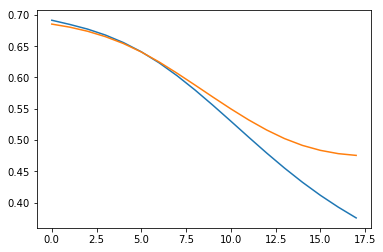

In [229]:
plt.plot(range(epochs),losses)
plt.plot(range(epochs), test_losses)

Accuracy is:  0.79


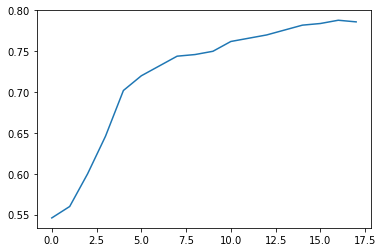

In [230]:
test_correct_percentage = [elemento/len(y_test) for elemento in test_correct]

plt.plot(range(epochs), test_correct_percentage)

print("Accuracy is: ", "{:.2f}".format(test_correct_percentage[-1].item()))


# Regression with sklearn (for rating)

In [9]:
df_rating = pd.read_csv('rating_reduced.csv')
df_rating = df_rating.drop(columns='Unnamed: 0')
df_rating

,Rating,0,1,2,3,4,5,6,7,8,...,989,990,991,992,993,994,995,996,997,998
0,2,1,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,4,0,1,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1,1,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,1,1,1,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,1,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,4,1,0,0,1,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2996,4,1,1,1,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2997,4,1,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2998,3,1,1,1,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
X = df_rating.drop(['Rating'], axis = 1)
y = df_rating['Rating']

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 26)

In [12]:
from sklearn.linear_model import LogisticRegression

# Create instance of model
lreg = LogisticRegression()
# Pass training data into model
lreg.fit(x_train, y_train)

C:\Users\valfaro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [13]:
y_pred_lreg = lreg.predict(x_test)

In [14]:
# Confusion Matrix
print('Logistic Regression')
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_lreg))
print('--'*50)

# Classification Report
print('Classification Report')
print(classification_report(y_test,y_pred_lreg))


# Accuracy of our model
print('--'*50)
logreg_accuracy = round(accuracy_score(y_test, y_pred_lreg) * 100,8)
print('Accuracy = ', logreg_accuracy,'%')

Logistic Regression


Confusion Matrix
[[ 39  18   8   3]
 [ 20  28  27  17]
 [  2  25  40  61]
 [  5  12  46 249]]
----------------------------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           1       0.59      0.57      0.58        68
           2       0.34      0.30      0.32        92
           3       0.33      0.31      0.32       128
           4       0.75      0.80      0.78       312

    accuracy                           0.59       600
   macro avg       0.50      0.50      0.50       600
weighted avg       0.58      0.59      0.59       600

----------------------------------------------------------------------------------------------------
Accuracy =  59.33333333 %


In [15]:
#everything runs nice!

# Let's try a pytorch ann model (for rating)

In [231]:
import pandas as pd

df_rating = pd.read_csv('rating_reduced.csv')
df_rating = df_rating.drop(columns='Unnamed: 0')
df_rating

,Rating,0,1,2,3,4,5,6,7,8,...,989,990,991,992,993,994,995,996,997,998
0,2,1,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,4,0,1,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1,1,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,1,1,1,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,1,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
5,4,1,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,3,1,1,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,4,1,0,0,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
8,3,1,0,1,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
9,4,0,1,0,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [232]:
y = torch.tensor(df_rating['Rating'].values).flatten()

In [233]:
y.shape

torch.Size([3000])

In [234]:
y = y-1 #there are four labels 1,2,3,4. But for the model to understand what's going on they need to be re categorized
#from 0 to 3. That's why we do this!

In [235]:
X = np.stack([df_rating.iloc[:,i].values for i in range(1,1000)], 1)

In [236]:
X.shape

(3000, 999)

In [237]:
X

array([[1, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0]], dtype=int64)

In [238]:
X = torch.tensor(X, dtype=torch.float)

In [239]:
X

tensor([[1., 1., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [1., 1., 1.,  ..., 0., 0., 0.],
        ...,
        [1., 1., 1.,  ..., 0., 0., 0.],
        [1., 1., 1.,  ..., 0., 0., 0.],
        [1., 0., 1.,  ..., 0., 0., 0.]])

In [240]:
X.type()

'torch.FloatTensor'

## Perform train/test splits
At this point our batch size is the entire dataset of 3000 records. To save time we'll use the first 1500. Recall that our tensors are not already randomly shuffled... Maybe I'll do later

In [241]:
batch_size = 3000 #includes test+train
test_size = 500

X_train = X[:batch_size-test_size]
X_test = X[batch_size-test_size:batch_size]
y_train = y[:batch_size-test_size]
y_test = y[batch_size-test_size:batch_size]

In [242]:
len(X_train)

2500

In [243]:
len(X_test)

500

In [244]:
X_train.shape

torch.Size([2500, 999])

In [245]:
y_test

tensor([2, 3, 3, 0, 2, 3, 3, 3, 3, 3, 0, 1, 3, 2, 3, 0, 2, 3, 1, 3, 3, 1, 3, 3,
        3, 3, 1, 3, 3, 3, 1, 2, 3, 0, 0, 3, 2, 1, 0, 3, 2, 1, 3, 3, 3, 3, 3, 0,
        1, 3, 2, 3, 2, 3, 3, 3, 3, 2, 0, 3, 1, 3, 1, 2, 2, 1, 1, 3, 3, 1, 1, 3,
        3, 0, 3, 3, 0, 3, 0, 3, 2, 2, 3, 3, 3, 3, 0, 3, 1, 3, 2, 3, 2, 3, 1, 3,
        0, 0, 3, 0, 3, 1, 1, 3, 3, 2, 3, 3, 1, 0, 3, 3, 3, 0, 3, 3, 3, 3, 2, 0,
        3, 3, 3, 2, 0, 3, 2, 1, 2, 3, 3, 2, 3, 2, 2, 2, 3, 3, 3, 3, 3, 1, 3, 3,
        3, 3, 3, 3, 1, 3, 1, 2, 0, 1, 2, 3, 3, 3, 3, 0, 2, 2, 2, 3, 3, 3, 0, 3,
        1, 3, 3, 3, 1, 3, 2, 3, 3, 1, 2, 1, 3, 3, 1, 3, 3, 1, 2, 3, 1, 3, 3, 3,
        1, 2, 2, 3, 3, 0, 2, 2, 3, 0, 0, 3, 2, 1, 3, 3, 3, 2, 3, 3, 3, 2, 0, 3,
        3, 3, 0, 3, 2, 1, 3, 3, 0, 3, 3, 3, 0, 2, 3, 3, 3, 1, 3, 3, 0, 1, 2, 3,
        1, 3, 2, 3, 3, 2, 3, 0, 3, 2, 3, 3, 0, 0, 3, 3, 3, 3, 1, 1, 0, 2, 3, 1,
        1, 1, 3, 3, 1, 3, 2, 3, 2, 3, 2, 3, 3, 0, 3, 2, 3, 3, 0, 3, 3, 3, 3, 1,
        1, 3, 1, 2, 3, 3, 2, 3, 3, 3, 3,

## Create model

In [246]:
class MultilayerPerceptron(nn.Module):
    def __init__(self, in_sz=999, out_sz=4, layers=[120,84]):
        super().__init__()
        self.fc1 = nn.Linear(in_sz,layers[0])
        self.fc2 = nn.Linear(layers[0],layers[1])
        self.fc3 = nn.Linear(layers[1],out_sz)
    
    def forward(self,X):
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return F.log_softmax(X, dim=1)

In [247]:
torch.manual_seed(101)
model_rating_torch = MultilayerPerceptron()
model_rating_torch

MultilayerPerceptron(
  (fc1): Linear(in_features=999, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=4, bias=True)
)

In [248]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_rating_torch.parameters(), lr=0.001)


### Train the model

In [249]:
import time
start_time = time.time()

epochs = 50
losses = []
test_losses=[]
test_correct = []

for i in range(epochs):
    tst_corr=0
    i+=1
    y_pred = model_rating_torch(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss)
    
    if i%25 == 1:
        print(f'epoch: {i:3}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    with torch.no_grad():
        y_val = model_rating_torch(X_test)
        loss = criterion(y_val, y_test)
        test_losses.append(loss)
        
        predicted = torch.max(y_val.data, 1)[1] 
        tst_corr += (predicted == y_test).sum().float()
        test_correct.append(tst_corr)


print(f'epoch: {i:3}  loss: {loss.item():10.8f}') # print the last line
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed

epoch:   1  loss: 1.41715658
epoch:  26  loss: 0.96780586
epoch:  50  loss: 0.86102110

Duration: 1 seconds


### Validate the model

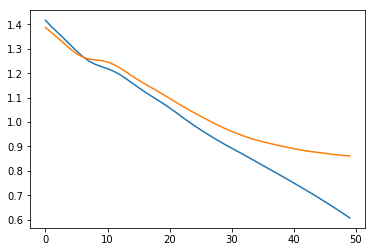

In [250]:
plt.plot(range(epochs),losses)
plt.plot(range(epochs), test_losses)

Accuracy is:  0.63


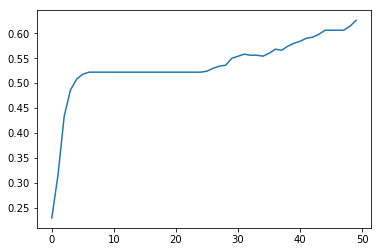

In [251]:
test_correct_percentage = [elemento/len(y_test) for elemento in test_correct]

plt.plot(range(epochs), test_correct_percentage)

print("Accuracy is: ", "{:.2f}".format(test_correct_percentage[-1].item()))
